In [2]:
import pandas as pd
import numpy as np

In [3]:
train_df = pd.read_csv('./car/train.csv')
test_df = pd.read_csv('./car/test.csv')

print "Train Shape:",train_df.shape
print "Test Shape:", test_df.shape

Train Shape: (4209, 378)
Test Shape: (4209, 377)


In [4]:
train_df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
train_df.describe(include=[np.object])

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,v,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [29]:
train_df.columns[ train_df.dtypes == np.object ].tolist()

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [44]:
train_df.dtypes[ train_df.dtypes == np.object ].index.tolist()

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [37]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
type(train_df.dtypes)

pandas.core.series.Series

In [6]:
dtype_df = train_df.dtypes.reset_index()
type(dtype_df)
#dtype_df.unique()
dtype_df.columns = ['Feat', 'ColType']
g = dtype_df.groupby("ColType").count()
#type(g)
#g.columns
#g.index
#$dtype_df.head()
g

,Feat
ColType,
int64,369
float64,1
object,8


In [8]:
count_dict = {}
for col in train_df.columns:
    arr_count = len(train_df[col].unique())
    count_dict.setdefault(arr_count, [])
    count_dict[arr_count].append(col)

for key,val in count_dict.items():
    print key, val

1 ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
2 ['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X

In [9]:
for col in count_dict[1]:
    train_df.drop(col, axis=1, inplace=True)
    test_df.drop(col, axis=1, inplace=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 366 entries, ID to X385
dtypes: float64(1), int64(357), object(8)
memory usage: 11.8+ MB


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_stripplot_y(var_name):
    col_order = np.sort(train_df[var_name].unique()).tolist()
    plt.figure(figsize=(12,6))
    sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
    plt.xlabel(var_name)
    plt.ylabel('y')
    plt.title("Distribution of y variable with" + var_name)
    plt.show()
    
#for var in ['X1','X2']:
 #   plot_stripplot_y(var)

In [11]:
def plot_boxplot_y(var_name):
    col_order = np.sort(train_df[var_name].unique()).tolist()
    plt.figure(figsize=(12,6))
    sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
    plt.xlabel(var_name)
    plt.ylabel('y')
    plt.title("Distribution of y variable with" + var_name)
    plt.show()
    
#for var in ['X12','X13']:
 #   plot_boxplot_y(var)

In [12]:
X = pd.DataFrame([['a', 0, 3], ['c', 1, 0], ['c', 2, 1], ['b', 0, 2]], columns=list('ABC'))
X

,A,B,C
0,a,0,3
1,c,1,0
2,c,2,1
3,b,0,2


In [13]:
pd.get_dummies(X)

,B,C,A_a,A_b,A_c
0,0,3,1,0,0
1,1,0,0,0,1
2,2,1,0,0,1
3,0,2,0,1,0


In [14]:
#train_df_dummy = pd.get_dummies(train_df)
#test_df_dummy = pd.get_dummies(test_df)
#train_df_dummy.head()

In [15]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#categorical_features = ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]
#for f in categorical_features:
 #       lbl = LabelEncoder()
 #       lbl.fit(list(train_df[f].values)) 
 #       train_df[f] = lbl.transform(list(train_df[f].values))
#train_df.head()

for col in train_df.columns:
    if train_df[col].dtype == 'object':
        lbl = LabelEncoder() 
        lbl.fit(list(train_df[col].values) + list(test_df[col].values)) 
        train_df[col] = lbl.transform(list(train_df[col].values))
        test_df[col] = lbl.transform(list(test_df[col].values))
        
        scaler = StandardScaler()
        scaler.fit(list(train_df[col].values) + list(test_df[col].values))
        train_df[col] = scaler.transform(list(train_df[col].values))
        test_df[col] = scaler.transform(list(test_df[col].values))

C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it conta

In [17]:
from sklearn.model_selection import train_test_split


X = train_df.drop(['y'], axis=1)
y = train_df['y']

#test_df = test_df.drop(['ID'], axis=1)

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2218,4433,-1.567155,1.394621,1.895235,-0.526964,0.032715,0.212248,-1.323822,-0.510179,0,...,0,0,1,0,0,0,0,0,0,0
1688,3383,-0.853531,0.223218,-0.098408,0.041752,0.032715,-1.148098,1.096367,-0.083215,0,...,0,0,0,0,0,0,0,0,0,0
2242,4487,0.638592,-0.831045,-0.098408,-0.526964,0.032715,0.212248,0.750626,1.197676,0,...,0,0,1,0,0,0,0,0,0,0
582,1133,1.092716,-0.128203,-0.098408,0.041752,0.032715,-0.581287,0.750626,-0.937143,0,...,0,0,1,0,0,0,0,0,0,0
2132,4262,0.898091,1.277481,-0.098408,-0.526964,0.032715,0.325610,0.750626,1.766961,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
dtr = DecisionTreeRegressor(max_depth=4)
dtr.fit(X_train, y_train)
dtr

# Predict
#X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
#y_1 = regr_1.predict(X_test)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [19]:
from sklearn.metrics import r2_score,mean_squared_error
def get_eval(dtr, X_eval, y_eval):
    y_pred =  dtr.predict(X_eval)
    print("R2:",r2_score(y_eval, y_pred))
    #print("MSE:",mean_squared_error(y_eval, y_pred))

In [20]:
#test_df_dummy.head()

In [21]:
get_eval(dtr, X_train, y_train)
get_eval(dtr, X_eval, y_eval)

('R2:', 0.62059281607703709)
('R2:', 0.46317733200317113)


In [22]:
sum(dtr.feature_importances_)

1.0

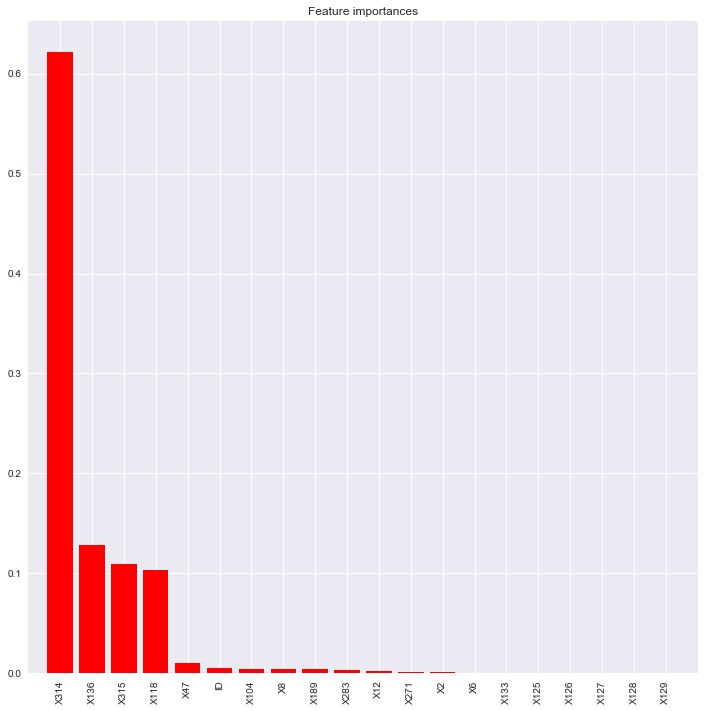

In [23]:
feat_names = X_train.columns.values

## plot the importances ##
importances = dtr.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [24]:
# res
def out_res_file(dtr, test_df, out_file):
    y_pred =  dtr.predict(test_df)
    output = pd.DataFrame({'id': test_df['ID'].astype(np.int32), 'y': y_pred})
    output.to_csv(out_file, index=False)
    
out_res_file(dtr, test_df, 'dtr_max_depth_4.csv')

In [25]:
from sklearn.ensemble import RandomForestRegressor
# Fit regression model
rf = RandomForestRegressor(n_estimators=50, max_depth=5)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [26]:
get_eval(rf, X_train, y_train)
get_eval(rf, X_eval, y_eval)

('R2:', 0.64858756381118898)
('R2:', 0.4923101657420117)


In [27]:
out_res_file(rf, test_df, 'drf_tree_10.csv')

In [28]:
for n_est in [30,50,100,200]:
    for depth in [3,4]:
        rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth)
        rf.fit(X_train, y_train)
        s_train = get_eval(rf, X_train, y_train)
        s_eval = get_eval(rf, X_eval, y_eval)
        print "tree:%d depth:%d "%(n_est, depth), s_train, s_eval

('R2:', 0.60845236650027146)
('R2:', 0.49617096246717129)
tree:30 depth:3  None None


('R2:', 0.62724962369025494)
('R2:', 0.49422126645696041)
tree:30 depth:4  None None


('R2:', 0.6080218152411091)
('R2:', 0.49736736134264348)
tree:50 depth:3  None None


('R2:', 0.6292326433069404)
('R2:', 0.49727635303057105)
tree:50 depth:4  None None


('R2:', 0.60791687769295999)
('R2:', 0.49674556874491327)
tree:100 depth:3  None None


('R2:', 0.62846208927712621)
('R2:', 0.49512233337517497)
tree:100 depth:4  None None


('R2:', 0.60835195586330171)
('R2:', 0.49735661941445986)
tree:200 depth:3  None None


('R2:', 0.62796331889713719)
('R2:', 0.49546413960276381)
tree:200 depth:4  None None


In [29]:
from sklearn import svm
svr = svm.LinearSVR()
svr.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [30]:
get_eval(svr, X_train, y_train)
get_eval(svr, X_eval, y_eval)

('R2:', -0.55340300687138622)
('R2:', -0.52178841338146276)


In [30]:
out_res_file(svr, test_df, 'svr.csv')